Решение SimpleControlProblem дискретным алгоритмом A3C 

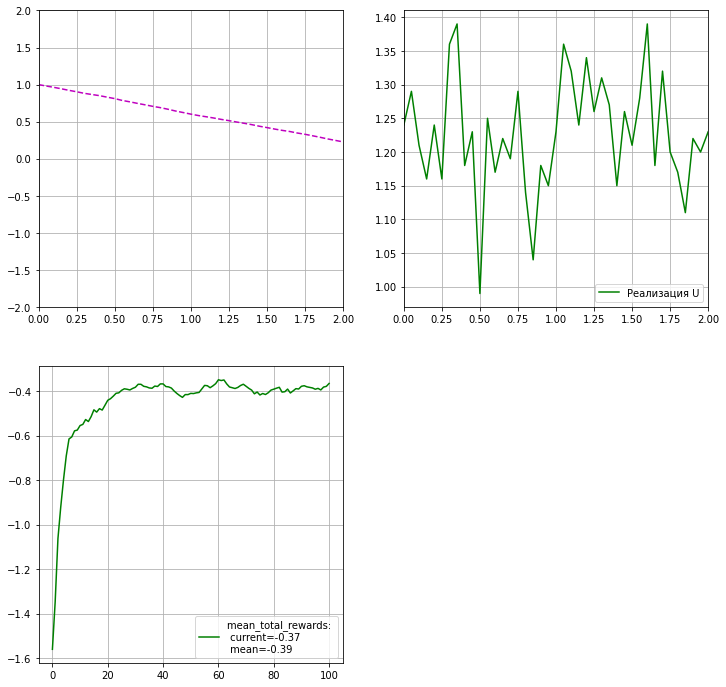

In [14]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))

import numpy as np
import torch.nn as nn
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.A2C import A2C_Discrete
from Agents.Utilities.ContinuousAgentMakers.ContinuousAgentMaker import  ContinuousAgentMaker
from Agents.Utilities.AsynchronousAgentMaker import AsynchronousAgentMaker
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
import Solvers.OneAgentSolver as solver
%load_ext autoreload
%autoreload 2

#environment initialization
env = SimpleControlProblem()
action_n = 5
action_values = np.linspace(env.action_min, env.action_max, num=action_n)

#agent initialization
pi_model = SequentialNetwork([env.state_dim, 128, action_n], nn.ReLU())
v_model = SequentialNetwork([env.state_dim, 128, 1], nn.ReLU())
A2C_Discrete = ContinuousAgentMaker(A2C_Discrete)
agent = A2C_Discrete(pi_model, v_model, action_values=action_values, gamma=1,
                     pi_model_lr=1e-3, v_model_lr=1e-3, entropy_threshold=0.01)
agent = AsynchronousAgentMaker(agent)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=10)
solver.go_asynchronously(env, agent, episode_n=101, show=visualizer.show, session_len=2500, session_n=10)
